Logistic Regression is a supervised classification algorithm used when the target variable is categorical, typically binary (0 or 1)


Logistic Regression Model
Linear equation:z=beta0+beta1x1+bet2x2+....

This value z is then passed through the Sigmoid function.

Logistic Regression Model
Linear equation:
	​sigmoid(z)=(1+e^-z)^-1
This value z is then passed through the Sigmoid function.(logistic regression model linear equation)



threshold is the cut-off probability used to convert a predicted probability into a class label.

standard threshold value is 0.5

if value<0.5 class 0

value>0.5 class 1

In [1]:
import pandas as pd

data=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
data.shape

(768, 9)

### Blood Pressure min value is 24,max value is 122 and its range is 98
### Glucose min value is 60,max value is 180 and its range is 155
### DiabetesPedigreeFunction min value is 0.08,max value is 2.42 and its range is 2.34
### SkinThickness min value is 10,max value is 50 and its range is 40


In [3]:
(data == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [4]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].median())

data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].median())

data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())

data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())


data['BMI']=data['BMI'].replace(0,data['BMI'].median())


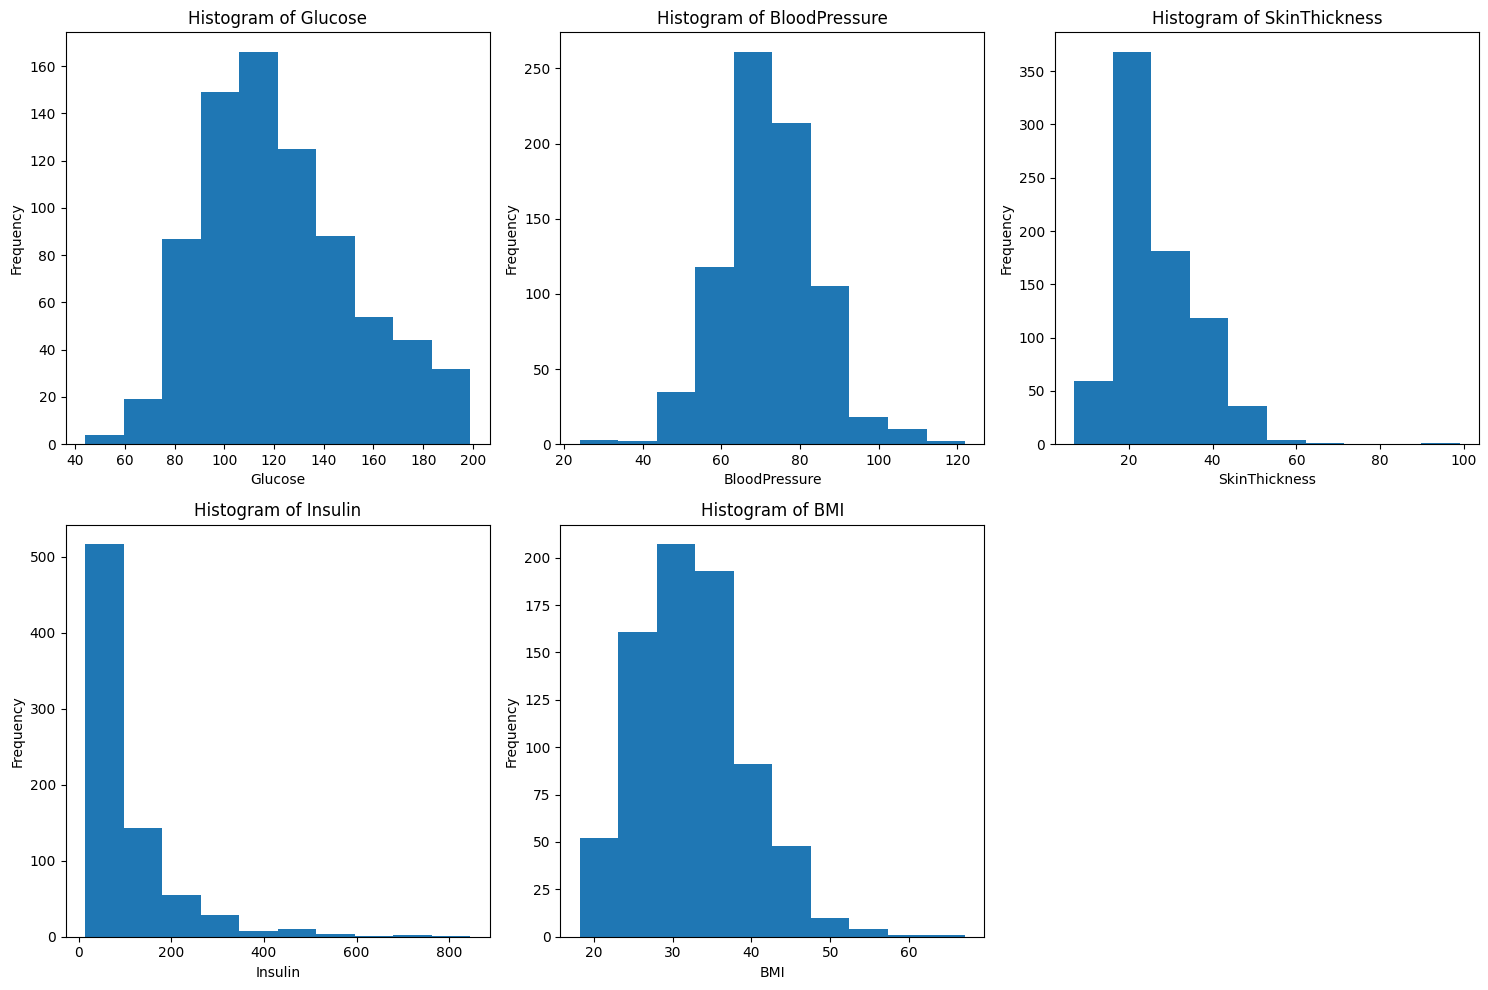

In [5]:
import matplotlib.pyplot as plt

# Columns to plot
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Plot histograms
plt.figure(figsize=(15,10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    plt.hist(data[col], bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [6]:
# zero_containing_count=[
#     'Glucose','BloodPressure','SkinThickness','Insulin','BMI'
# ]
# print(zero_containing_count)

# for i in zero_containing_count:
#     data[i]=data[i].replace(0,data[i].median())
    
# (data==0).sum()

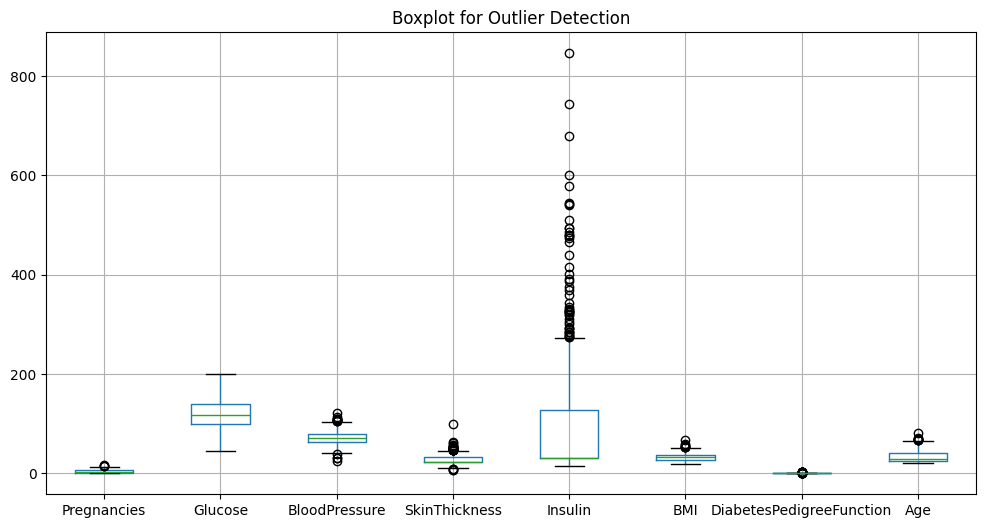

In [7]:
import matplotlib.pyplot as plt

data.drop('Outcome',axis=1).boxplot(figsize=(12,6))
plt.title("Boxplot for Outlier Detection")
plt.show()


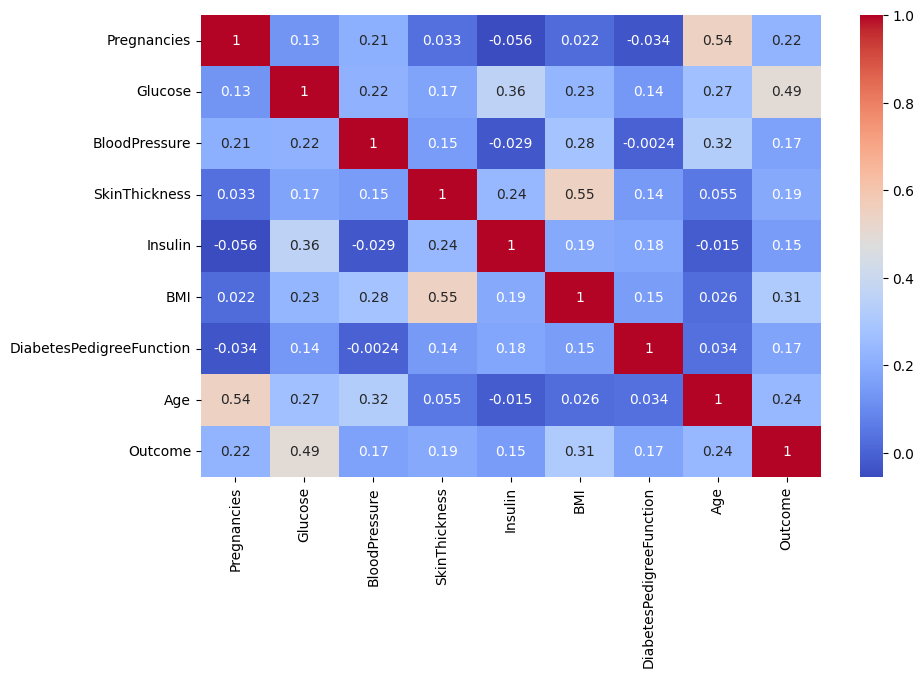

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


## outcome is highly coorelated with gulcose,bmi,age,pregnancies

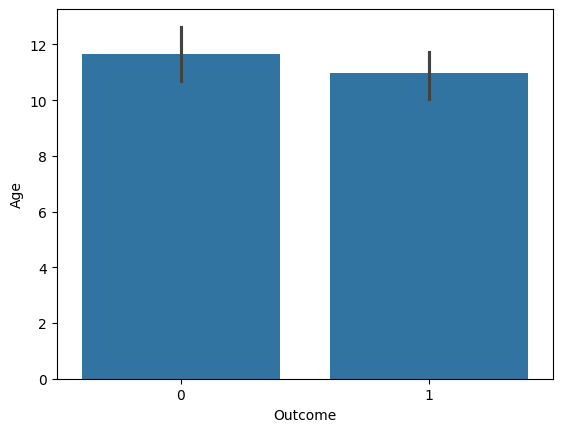

In [9]:
sns.barplot(x='Outcome',y='Age',data=data,estimator='std')
plt.show()

In [10]:
data['Age'].groupby(data['Outcome']).mean()


Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

<Axes: xlabel='Age'>

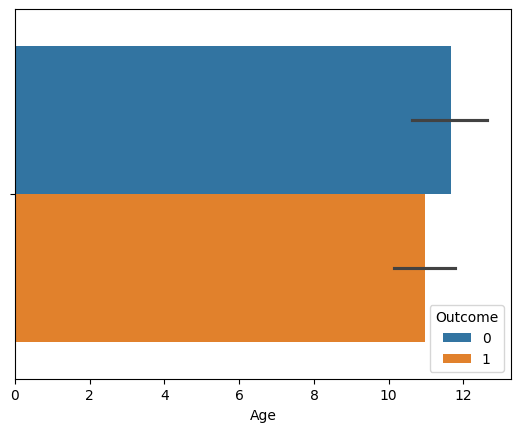

In [11]:
sns.barplot(x=data['Age'],hue=data['Outcome'],estimator='std')

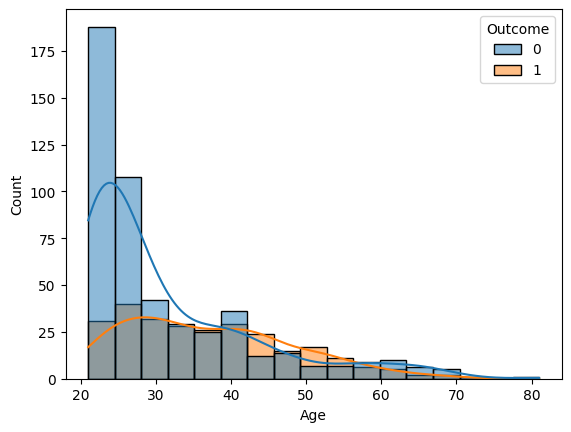

In [12]:
sns.histplot(x='Age',hue='Outcome',data=data,kde=True)
plt.show()

In [13]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [14]:
data['BMI'].groupby(data['Outcome']).mean()


Outcome
0    30.880200
1    35.381343
Name: BMI, dtype: float64

<Axes: xlabel='BMI'>

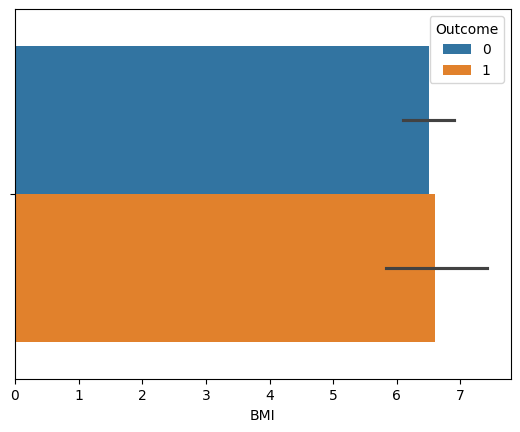

In [15]:
sns.barplot(x=data['BMI'],hue=data['Outcome'],estimator='std')

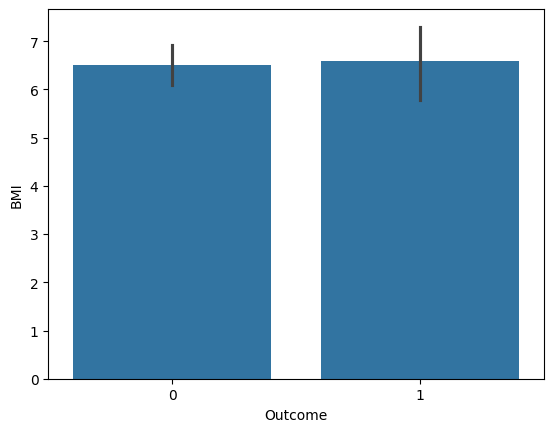

In [16]:
sns.barplot(x='Outcome',y='BMI',data=data,estimator='std')
plt.show()

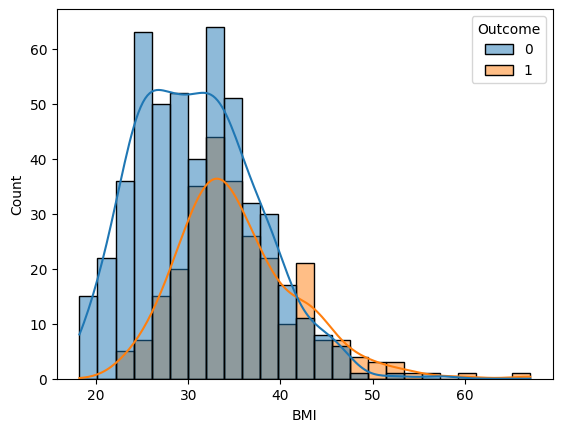

In [17]:
sns.histplot(x='BMI',hue='Outcome',data=data,kde=True)
plt.show()

###Hypothesis Testing :to find the dissimilarity between the dataset
It helps us test whether two datasets are significantly different (dissimilar).   

Null Hypothesis (H₀)
Assumes no difference / no dissimilarity

Alternative Hypothesis (H₁ or Hₐ)
Assumes there is a difference / dissimilarity

Significance Level (α)
Probability of rejecting a true H₀
Common value: 0.05 (5%)


p-Value
Probability of observing the data assuming H₀ is true
p-Value	Decision
p ≤ α	Reject H₀ (datasets are dissimilar)
p > α	Fail to reject H₀ (datasets are similar)

In [18]:
die_age=data['Age'][data["Outcome"]==1]
nondie_age=data['Age'][data["Outcome"]==0]


In [19]:
from scipy.stats import ttest_ind

stat,p=ttest_ind(die_age,nondie_age)
alpha=0.5
if(p<alpha):
    print("reject h0")
else:
    print("Accept H0")

reject h0


In [20]:
die_bmi=data['BMI'][data["Outcome"]==1]
nondie_bmi=data['BMI'][data["Outcome"]==0]


In [21]:
from scipy.stats import ttest_ind

stat,p=ttest_ind(die_bmi,nondie_bmi)
alpha=0.5

if(p<alpha):
    print("reject h0")
else:
    print("Accept H0")

reject h0


In [22]:
die_bp=data['BloodPressure'][data["Outcome"]==1]
nondie_bp=data['BloodPressure'][data["Outcome"]==0]

stat,p=ttest_ind(die_bp,nondie_bp)
alpha=0.5

if(p<alpha):
    print("reject h0")
else:
    print("Accept H0")

reject h0


In [23]:
data['BloodPressure'].groupby(data['Outcome']).mean()


Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64

<Axes: xlabel='BloodPressure'>

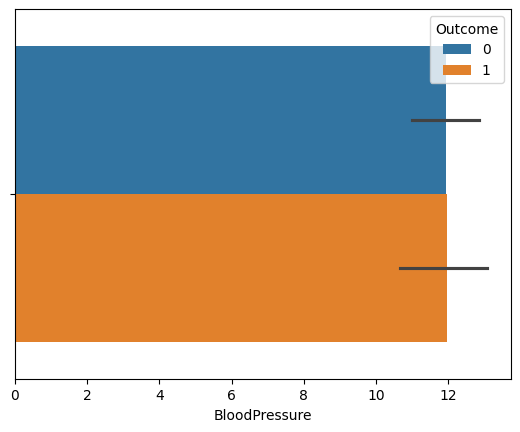

In [24]:
sns.barplot(x=data['BloodPressure'],hue=data['Outcome'],estimator='std')

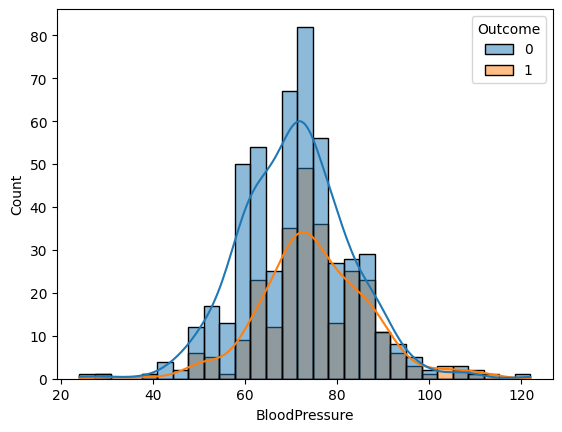

In [25]:
sns.histplot(x='BloodPressure',hue='Outcome',data=data,kde=True)
plt.show()

### The average BloodPressure of diabetic people is significantly different from non-diabetic people

## Diabetic and non-diabetic groups do not behave the same

In [26]:
data['Insulin'].groupby(data['Outcome']).mean()


Outcome
0     83.188000
1    116.041045
Name: Insulin, dtype: float64

In [27]:
die_insulin=data['Insulin'][data["Outcome"]==1]
nondie_insulin=data['Insulin'][data["Outcome"]==0]

stat,p=ttest_ind(die_insulin,nondie_insulin)
alpha=0.5

if(p<alpha):
    print("reject h0")
else:
    print("Accept H0")

reject h0


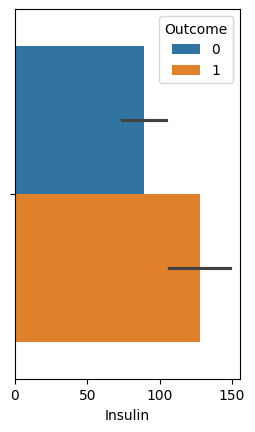

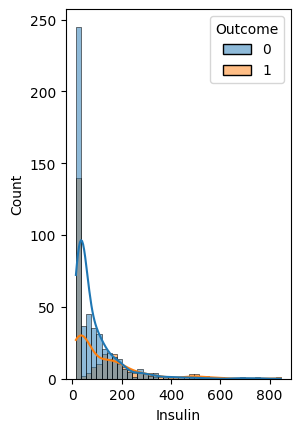

In [28]:
plt.subplot(1,2,1)
sns.barplot(x=data['Insulin'],hue=data['Outcome'],estimator='std')
plt.show()

plt.subplot(1,2,2)
sns.histplot(x='Insulin',hue='Outcome',data=data,kde=True)
plt.show()


In [29]:
die_skin=data['SkinThickness'][data["Outcome"]==1]
nondie_skin=data['SkinThickness'][data["Outcome"]==0]

stat,p=ttest_ind(die_insulin,nondie_insulin)
alpha=0.5

if(p<alpha):
    print("reject h0")
else:
    print("Accept H0")

reject h0


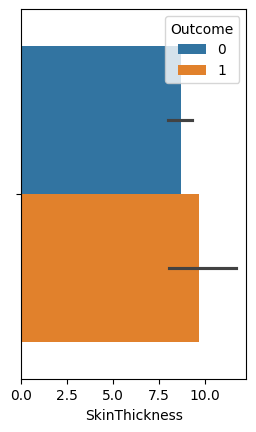

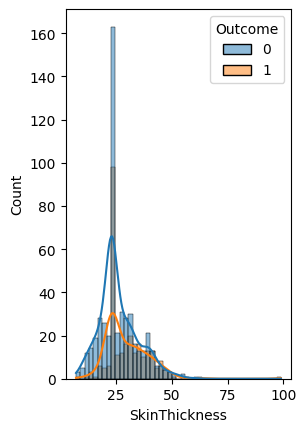

In [30]:
plt.subplot(1,2,1)
sns.barplot(x=data['SkinThickness'],hue=data['Outcome'],estimator='std')
plt.show()

plt.subplot(1,2,2)
sns.histplot(x='SkinThickness',hue='Outcome',data=data,kde=True)
plt.show()


## Rejecting the null hypothesis indicates that SkinThickness differs significantly between diabetic and non-diabetic individuals, showing SkinThickness is an important risk factor.,it has effect on outcome column

<Axes: >

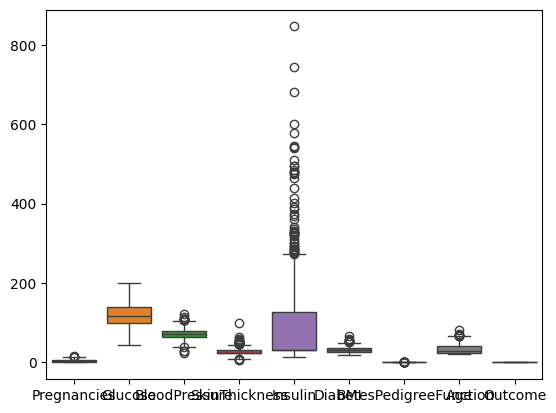

In [31]:
sns.boxplot(data=data)

In [32]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

numeric_cols = data.select_dtypes(include=np.number).columns.drop('Outcome')

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    print(f"{col} outliers:", outliers)

scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


Pregnancies outliers: 4
Glucose outliers: 0
BloodPressure outliers: 14
SkinThickness outliers: 35
Insulin outliers: 49
BMI outliers: 8
DiabetesPedigreeFunction outliers: 29
Age outliers: 9


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

X = data.drop(columns=['Outcome'])
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred=log_reg.predict(X_train)
print("Accuracy for training data:", accuracy_score(y_train, y_pred))
print("Confusion matrix",confusion_matrix(y_train,y_pred))
y_pred_test=log_reg.predict(X_test)
print("Accuracy for testing data:", accuracy_score(y_test, y_pred_test))
print("Confusion matrix",confusion_matrix(y_test,y_pred_test))




Accuracy for training data: 0.78125
Confusion matrix [[340  35]
 [ 91 110]]
Accuracy for testing data: 0.7291666666666666
Confusion matrix [[107  18]
 [ 34  33]]


## when target is a categorical with only 2 possible outcomes are called as Binary Classification

## Confusion Matrix:

### True positive:when the predicted value is positive and actually value is positive
### True Negative:when the predicted value is negative and actually the value is negative
### False positive:when the predicted value is positive and actually the value is negative
### False negative:when the predicted value is negative and actually the value is positive

### Accuracy score:(TP+TN)/(TP+TN+FP+FN) =>overall correctness of the model

### Recall: (TP)/(TP+FN)  =>how many positive cases are actually identifed

### Precision: (TP)/(TP+FP) => how many are actually positive

### f1 score : is the harmonic mean of precision and recall =>  2(precision*recall)/(precision+recall) 

### Tradeoff : we cannot maximise the precision and recall at same time ,they are inversely proportional with each other

ROC stands for Receiver Operating Characteristic.
It is a performance evaluation curve used for binary classification models



In [37]:
y_prob = log_reg.predict_proba(X_test)[:, 1]


0.8217313432835821


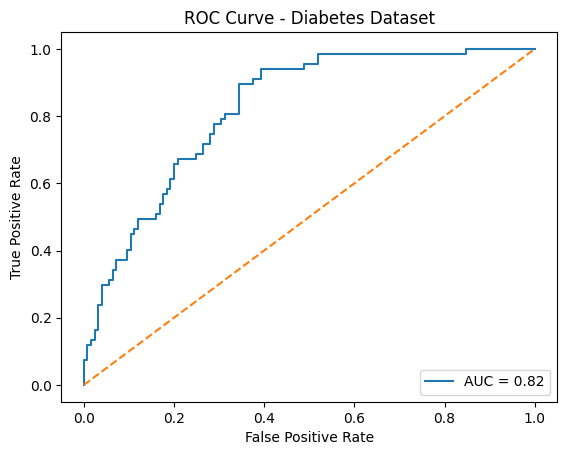

In [39]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
print(roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Diabetes Dataset")
plt.legend(loc="lower right")
plt.show()


In [40]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [41]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [43]:
df.shape

(918, 12)

In [42]:
(df==0).sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS         704
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease      410
dtype: int64

In [44]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
numeric_cols=['RestingBP','Cholesterol']

for i in numeric_cols:
    df[i]

In [45]:
from collections import Counter
strs = ["eat","tea","tan","ate","nat","bat"]
arr=[]
for i in strs:
    arr.append(Counter(i))
print(arr)


[Counter({'e': 1, 'a': 1, 't': 1}), Counter({'t': 1, 'e': 1, 'a': 1}), Counter({'t': 1, 'a': 1, 'n': 1}), Counter({'a': 1, 't': 1, 'e': 1}), Counter({'n': 1, 'a': 1, 't': 1}), Counter({'b': 1, 'a': 1, 't': 1})]


In [5]:
s=" the  sky is blue "
s=s.strip()
arr=s.split(" ")

print(arr)

['the', '', 'sky', 'is', 'blue']
